#### Lab1 - Zuzanna Olszówka

# Rozwiązanie

In [1]:
using LinearAlgebra, DataFrames, Statistics, CSV, Plots

### Obliczanie iloczynu skalarnego wektorów

In [2]:
function dot_product(first, second)
    return dot(first, second)
end

dot_product (generic function with 1 method)

### Mnożenie macierzy kwadratowej przez wektor

In [3]:
function matrix_vector(matrix, vector)
    return matrix*vector
end

matrix_vector (generic function with 1 method)

### Pomiar czasów działania obydwu funkcji

In [4]:
times1 = []
lengths = []
for length = 10:25:500
    for i = 1:11
        first = rand(0:9, length)
        second = rand(0:9, length)
        time = @timed dot_product(first, second)
        if i > 1
            push!(times1, time.time)
            push!(lengths, length)
        end
    end
end

In [5]:
times2 = []
for length = 10:25:500
    for i = 1:11
        matrix = rand(0:9,(length,length))
        vector = rand(0:9, length)
        time = @timed matrix_vector(matrix, vector)
        if i > 1
            push!(times2, time.time)
        end
    end
end

In [6]:
df1 = DataFrame(Length = lengths, Scalar = times1, Matrix = times2)

Row,Length,Scalar,Matrix
,Any,Any,Any
1,10,0.0,2.0e-7
2,10,0.0,2.0e-7
3,10,0.0,2.0e-7
4,10,1.0e-7,2.0e-7
5,10,0.0,2.0e-7
6,10,0.0,1.0e-7
7,10,0.0,1.0e-7
8,10,0.0,2.0e-7
9,10,0.0,2.0e-7


### Zapis wyników do pliku CSV

In [7]:
CSV.write("timetests.csv", df1)

"timetests.csv"

### Odczyt z pliku do DataFrame

In [8]:
df2 = CSV.read("timetests.csv", delim=",", DataFrame)

Row,Length,Scalar,Matrix
,Int64,Float64,Float64
1,10,0.0,2.0e-7
2,10,0.0,2.0e-7
3,10,0.0,2.0e-7
4,10,1.0e-7,2.0e-7
5,10,0.0,2.0e-7
6,10,0.0,1.0e-7
7,10,0.0,1.0e-7
8,10,0.0,2.0e-7
9,10,0.0,2.0e-7


### Średnia i odchylenie standardowe

In [9]:
grouped = groupby(df2, :Length)

Row,Length,Scalar,Matrix
,Int64,Float64,Float64
1,10,0.0,2.0e-7
2,10,0.0,2.0e-7
3,10,0.0,2.0e-7
4,10,1.0e-7,2.0e-7
5,10,0.0,2.0e-7
6,10,0.0,1.0e-7
7,10,0.0,1.0e-7
8,10,0.0,2.0e-7
9,10,0.0,2.0e-7


In [10]:
df3 = combine(grouped, :Scalar => mean, :Scalar => std, :Matrix => mean, :Matrix => std)

Row,Length,Scalar_mean,Scalar_std,Matrix_mean,Matrix_std
,Int64,Float64,Float64,Float64,Float64
1,10,1.0e-8,3.16228e-8,1.8e-7,4.21637e-8
2,35,6.0e-8,6.99206e-8,7.6e-7,5.16398e-8
3,60,5.0e-8,5.27046e-8,2.03e-6,8.23273e-8
4,85,6.0e-8,5.16398e-8,4.76e-6,9.97998e-7
5,110,1.0e-7,0.0,8.04e-6,3.23048e-6
6,135,1.1e-7,3.16228e-8,2.118e-5,2.06176e-5
7,160,1.3e-7,4.83046e-8,1.95e-5,3.23625e-6
8,185,1.3e-7,4.83046e-8,2.913e-5,2.54735e-6
9,210,1.6e-7,5.16398e-8,2.517e-5,2.46353e-6


### Wykresy

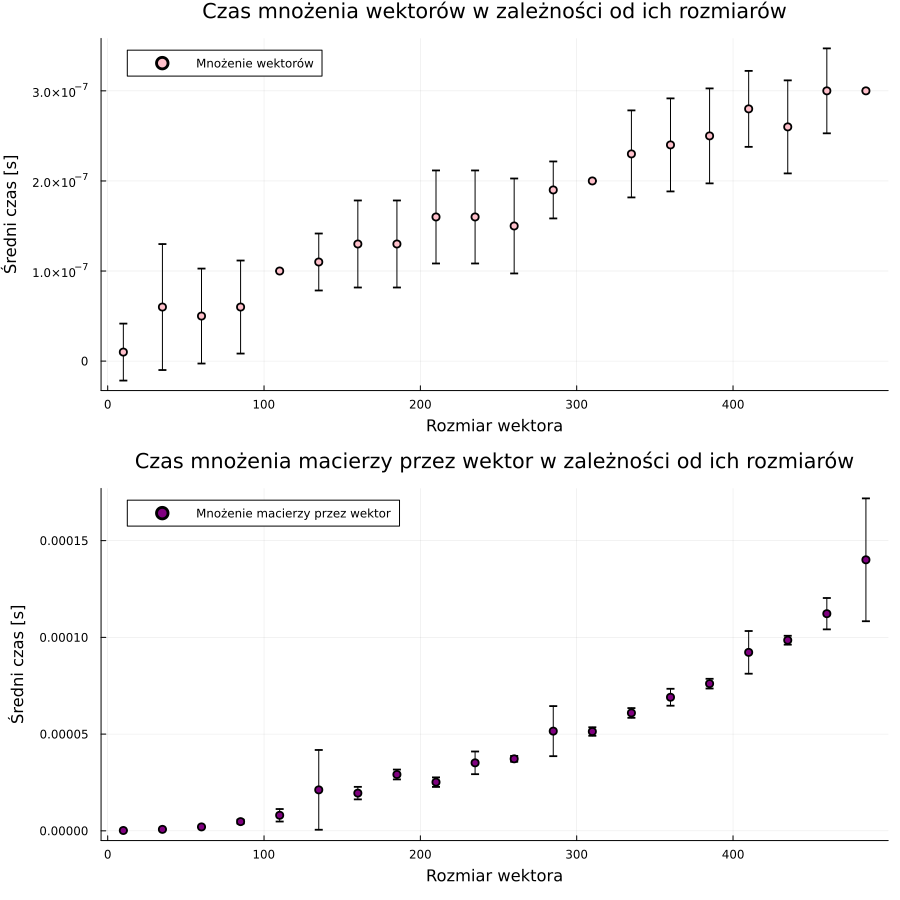

In [11]:
scatter(df3.Length,
    xlabel = "Rozmiar wektora",
    ylabel = "Średni czas [s]",
    title = ["Czas mnożenia wektorów w zależności od ich rozmiarów" "Czas mnożenia macierzy przez wektor w zależności od ich rozmiarów"], 
    legend_position = :topleft,
    label = ["Mnożenie wektorów" "Mnożenie macierzy przez wektor"],
    size = (900, 900),
    [df3.Scalar_mean df3.Matrix_mean],  
    color = [:pink :purple],
    yerr = [df3.Scalar_std df3.Matrix_std], 
    layout = grid(2,1))

### DataFrame - druga wersja

In [12]:
times = []
lengths = []
alg = []
for length = 10:25:500
    for i = 1:11
        first = rand(0:9, length)
        second = rand(0:9, length)
        time = @timed dot_product(first, second)
        if i > 1
            push!(times, time.time)
            push!(lengths, length)
            push!(alg, "Scalar")
        end
    end
end

In [13]:
for length = 10:25:500
    for i = 1:11
        matrix = rand(0:9,(length,length))
        vector = rand(0:9, length)
        time = @timed matrix_vector(matrix, vector)
        if i > 1
            push!(times, time.time)
            push!(lengths, length)
            push!(alg, "Matrix")
        end
    end
end

In [14]:
df4 = DataFrame(Alg = alg, Length = lengths, Time = times)

Row,Alg,Length,Time
,Any,Any,Any
1,Scalar,10,1.0e-7
2,Scalar,10,0.0
3,Scalar,10,0.0
4,Scalar,10,0.0
5,Scalar,10,0.0
6,Scalar,10,1.0e-7
7,Scalar,10,1.0e-7
8,Scalar,10,0.0
9,Scalar,10,1.0e-7


In [15]:
CSV.write("timetests2.csv", df4)

"timetests2.csv"

In [17]:
df5 = combine(groupby(df4, [:Length, :Alg]), :Time => mean, :Time => std)

Row,Length,Alg,Time_mean,Time_std
,Any,Any,Float64,Float64
1,10,Scalar,5.0e-8,5.27046e-8
2,35,Scalar,6.0e-8,5.16398e-8
3,60,Scalar,9.0e-8,8.75595e-8
4,85,Scalar,8.0e-8,4.21637e-8
5,110,Scalar,1.0e-7,8.16497e-8
6,135,Scalar,1.0e-7,0.0
7,160,Scalar,1.2e-7,4.21637e-8
8,185,Scalar,1.2e-7,4.21637e-8
9,210,Scalar,1.2e-7,4.21637e-8


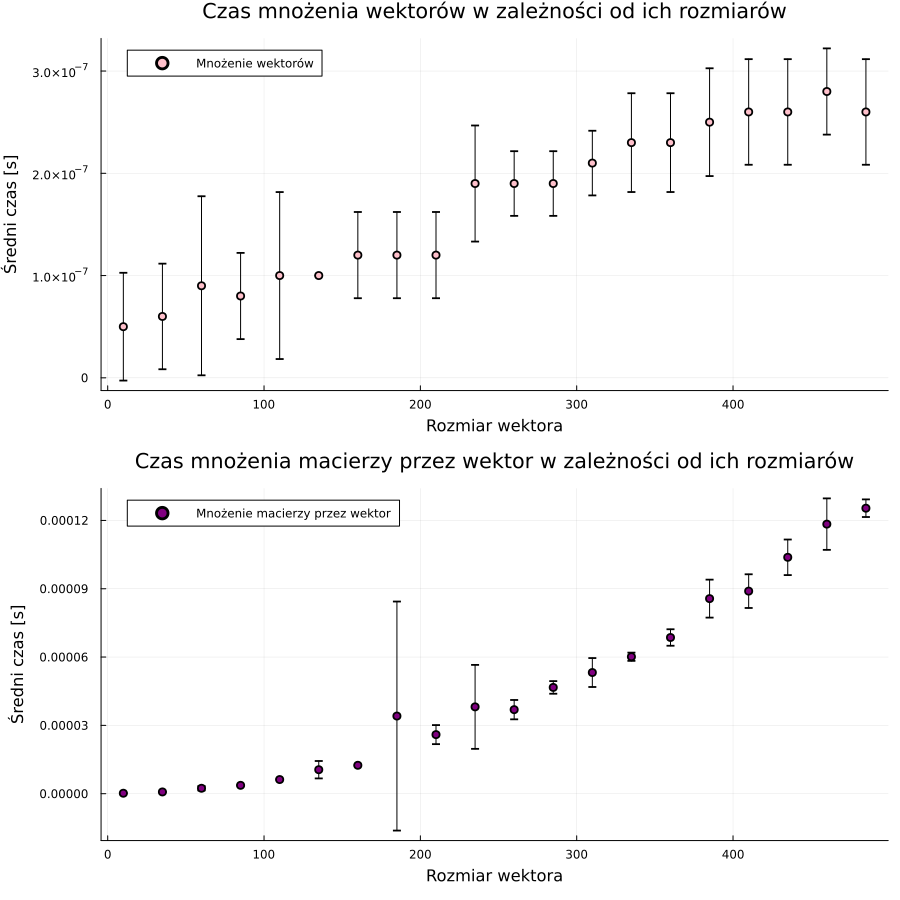

In [18]:
scatter(df5[df5[:,2] .== "Scalar", :].Length,
    xlabel = "Rozmiar wektora",
    ylabel = "Średni czas [s]",
    title = ["Czas mnożenia wektorów w zależności od ich rozmiarów" "Czas mnożenia macierzy przez wektor w zależności od ich rozmiarów"], 
    legend_position = :topleft,
    label = ["Mnożenie wektorów" "Mnożenie macierzy przez wektor"],
    size = (900, 900),
    [df5[df5[:,2] .== "Scalar", :].Time_mean df5[df5[:,2] .== "Matrix", :].Time_mean],  
    color = [:pink :purple],
    yerr = [df5[df5[:,2] .== "Scalar", :].Time_std df5[df5[:,2] .== "Matrix", :].Time_std], 
    layout = grid(2,1))